In [19]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import pearsonr
from scipy.spatial.distance import cosine

In [20]:
df=pd.read_csv('tabular/tabular/tracks.csv', skipinitialspace=True)

In [21]:
df.head()

,id,name,disc_number,duration_ms,explicit,popularity,track_number,artists,album_type,album_name,...,features_duration_ms,time_signature,start_of_fade_out,tempo_confidence,time_signature_confidence,key_confidence,mode_confidence,n_beats,n_bars,genre
0,4rjA5kJJWbwU1prXCvg6Fk,Grey,1,290479,False,52,5,Kölsch,album,1989,...,290479,3,275.90530,0.020,1.000,0.500,0.525,705.0,234.0,minimal-techno
1,6xzpUzzIquIyUzTLbbgSdI,Thrown,1,539229,False,45,5,Kiasmos,album,Kiasmos,...,539229,4,517.28253,0.678,0.326,0.410,0.589,1074.0,269.0,minimal-techno
2,56tXgHlSHCfgmGhwVXNizc,Routine,1,264200,False,39,5,Joris Delacroix,album,Night Visions,...,264200,3,259.04180,0.847,0.457,0.904,0.760,516.0,171.0,minimal-techno
3,0s3wIBczp6TdSJ2y8cveJl,Confronted - Anfisa Letyago Stranger Remix,1,387413,False,0,6,Pan-Pot;Anfisa Letyago,single,Confronted Remixes,...,387414,4,387.41360,0.882,0.498,0.512,0.503,826.0,207.0,minimal-techno
4,4PSbDDd1LRYMhqPXvza6I2,Jupiter Sunrise,1,248956,False,0,1,Kollektiv Turmstrasse,compilation,10 Years Diynamic,...,248957,4,239.63574,0.882,1.000,0.474,0.459,493.0,123.0,minimal-techno


### Partiamo dagli scatterplot rilevanti dal data understanding

In [22]:
pearson_corr, _ = pearsonr(df['start_of_fade_out'], df['n_beats'])
print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: 0.8496034580900361


In [23]:
pearson_corr, _ = pearsonr(df['start_of_fade_out'], df['duration_ms'])
print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: 0.9985324967887818


In [24]:
pearson_corr, _ = pearsonr(df['duration_ms'], df['n_beats'])
print("Pearson correlation coefficient:", pearson_corr)

Pearson correlation coefficient: 0.8497237209941092


In [25]:
# 0.99 ? mhhhh..
cosine_similarity_result = 1 - cosine(df['duration_ms'], df['start_of_fade_out'])
cosine_similarity_result

0.9997421110703005

<Axes: xlabel='start_of_fade_out', ylabel='Count'>

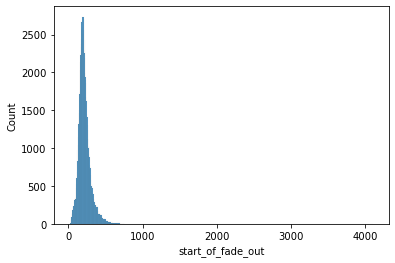

In [26]:
sns.histplot(df["start_of_fade_out"])

In [27]:
print(df["start_of_fade_out"].std()) # dev std
print(df["start_of_fade_out"].kurt()) # kurtosis
print(df["start_of_fade_out"].skew()) # skewness

96.17436043438141
125.6122543712825
5.788186796614059


<Axes: >

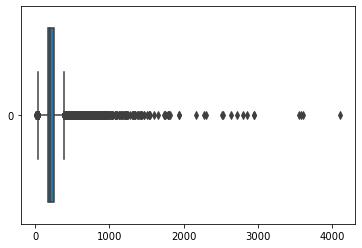

In [28]:
sns.boxplot(df["start_of_fade_out"], orient="h")

<Axes: xlabel='duration_ms', ylabel='Count'>

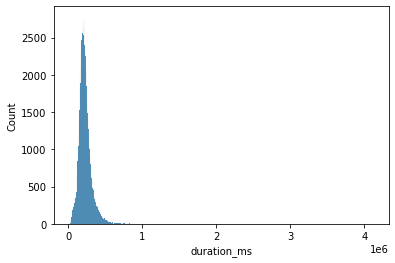

In [29]:
sns.histplot(df["duration_ms"])

In [30]:
print(df["duration_ms"].std()) # dev std
print(df["duration_ms"].kurt()) # kurtosis
print(df["duration_ms"].skew()) # skewness

97616.81921918818
119.7068435980545
5.612641293591713


<Axes: >

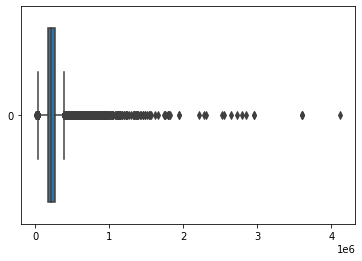

In [31]:
sns.boxplot(df["duration_ms"], orient="h")

<Axes: xlabel='n_beats', ylabel='Count'>

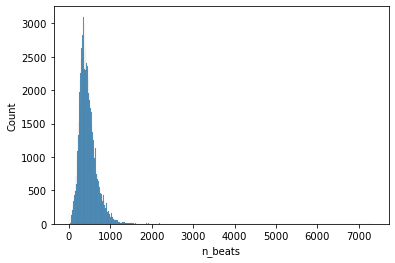

In [32]:
sns.histplot(df["n_beats"])

In [33]:
print(df["n_beats"].std()) # dev std
print(df["n_beats"].kurt()) # kurtosis
print(df["n_beats"].skew()) # skewness

224.65231827449543
56.49495288951307
3.529232530155651


<Axes: >

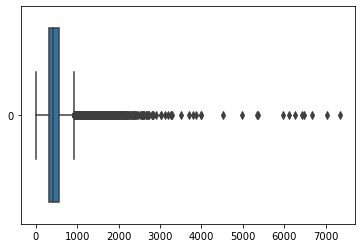

In [34]:
sns.boxplot(df["n_beats"], orient="h")

#### Correlazioni molto spurie (troppi outliers)...e probabilmente o si tiene fade_out o duration_ms (0.9997 come cosine sim)